### Importação dos dados



In [1]:
import pandas as pd

# Carregar os dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


loja1.info()
loja1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


Produto Categoria do Produto    Preço      Frete  \
0        Assistente virtual          eletronicos   219.08   9.249790   
1            Mesa de jantar               moveis   256.35  11.234305   
2         Jogo de tabuleiro           brinquedos   279.51  21.262681   
3               Micro-ondas     eletrodomesticos  1009.99  54.667344   
4     Cadeira de escritório               moveis   446.99  26.964689   
...                     ...                  ...      ...        ...   
2354       Celular Plus X42          eletronicos  1712.54  88.772042   
2355             Impressora          eletronicos   377.02  20.363958   
2356      Jogo de tabuleiro           brinquedos   163.82   9.611337   
2357               Cama box               moveis   921.77  46.665919   
2358             Smartwatch          eletronicos   259.95  11.425995   

     Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0        16/01/2021     Pedro Gomes              SP                    4   
1        18/05/2022  Beatriz Moraes              RJ                    1   
2        15/03/2021      João Souza              DF                    1   
3        03/05/2022      João Souza              RS                    4   
4        07/11/2020   Larissa Alves              MG                    5   
...             ...             ...             ...                  ...   
2354     15/11/2021    Thiago Silva              RJ                    1   
2355     18/03/2023  Lucas Oliveira              SP                    5   
2356     06/07/2021  Lucas Oliveira              PR                    5   
2357     02/05/2022     Pedro Gomes              RN                    1   
2358     18/06/2022   Felipe Santos              RS                    4   

     Tipo de pagamento  Quantidade de parcelas    lat    lon  
0       cartao_credito                       8 -22.19 -48.79  
1       cartao_credito                       4 -22.25 -42.66  
2       cartao_credito                       1 -15.83 -47.86  
3               boleto                       1 -30.17 -53.50  
4               boleto                       1 -18.10 -44.38  
...                ...                     ...    ...    ...  
2354            boleto                       1 -22.25 -42.66  
2355            boleto                       1 -22.19 -48.79  
2356    cartao_credito                       4 -24.89 -51.55  
2357    cartao_credito                       2  -5.81 -36.59  
2358    cartao_credito                       1 -30.17 -53.50  

[2359 rows x 12 columns]

#1. Análise do faturamento


In [2]:
import numpy as np

# Calculando o faturamento total por loja
faturamento1 = loja1["Preço"].sum()
faturamento2 = loja2["Preço"].sum()
faturamento3 = loja3["Preço"].sum()
faturamento4 = loja4["Preço"].sum()

# Exibindo os resultados
print("📊 Faturamento total por loja:\n")
print(f"Loja 1: R$ {faturamento1:,.2f}")
print(f"Loja 2: R$ {faturamento2:,.2f}")
print(f"Loja 3: R$ {faturamento3:,.2f}")
print(f"Loja 4: R$ {faturamento4:,.2f}")


📊 Faturamento total por loja:

Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


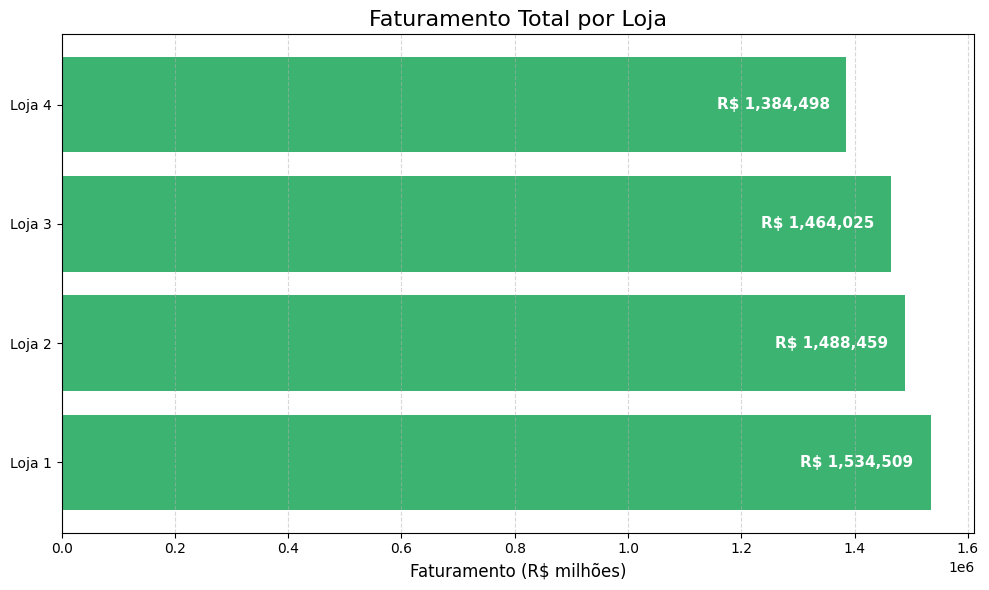

In [3]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
barras = plt.barh(["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
                  [faturamento1, faturamento2, faturamento3, faturamento4],
                  color="mediumseagreen")

plt.title("Faturamento Total por Loja", fontsize=16)
plt.xlabel("Faturamento (R$ milhões)", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Adiciona os valores dentro das barras
for barra in barras:
    plt.text(barra.get_width() * 0.98,  # um pouquinho antes da borda final
             barra.get_y() + barra.get_height() / 2,
             f'R$ {barra.get_width():,.0f}',
             va='center', ha='right', fontsize=11, color='white', weight='bold')

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


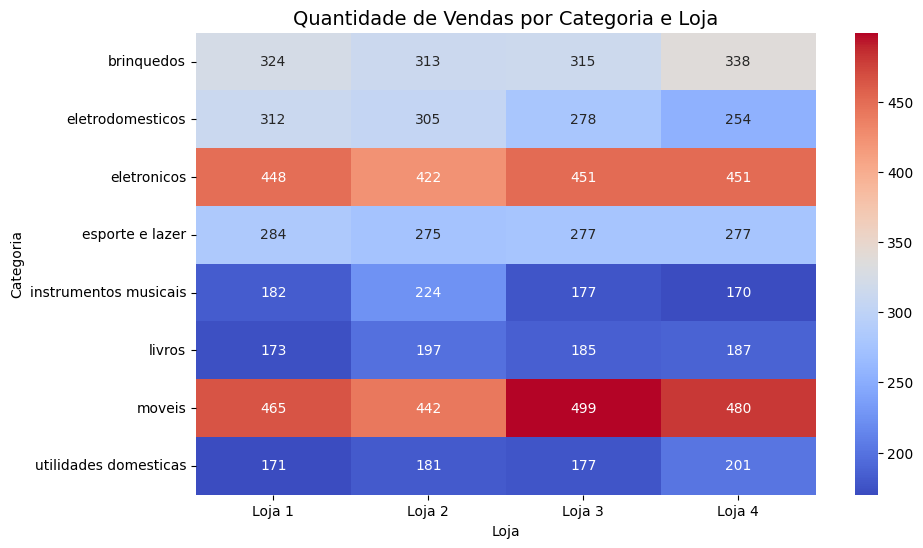

In [4]:
import seaborn as sns

# Construindo tabela cruzada: categorias x lojas
categorias = sorted(set(loja1["Categoria do Produto"]) |
                    set(loja2["Categoria do Produto"]) |
                    set(loja3["Categoria do Produto"]) |
                    set(loja4["Categoria do Produto"]))

dados = {
    'Loja 1': loja1['Categoria do Produto'].value_counts(),
    'Loja 2': loja2['Categoria do Produto'].value_counts(),
    'Loja 3': loja3['Categoria do Produto'].value_counts(),
    'Loja 4': loja4['Categoria do Produto'].value_counts(),
}

df_heatmap = pd.DataFrame(dados).fillna(0).reindex(categorias)

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, fmt='.0f', cmap="coolwarm",)
plt.title("Quantidade de Vendas por Categoria e Loja", fontsize=14)
plt.ylabel("Categoria")
plt.xlabel("Loja")
plt.show()

# 3. Média de Avaliação das Lojas

In [5]:
# Calcular a média das avaliações
avaliacoes = {
    "Loja 1": loja1["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

# Exibir os valores
print("📈 Média das Avaliações por Loja:\n")
for loja, media in avaliacoes.items():
    print(f"{loja}: {media:.2f}")

📈 Média das Avaliações por Loja:

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


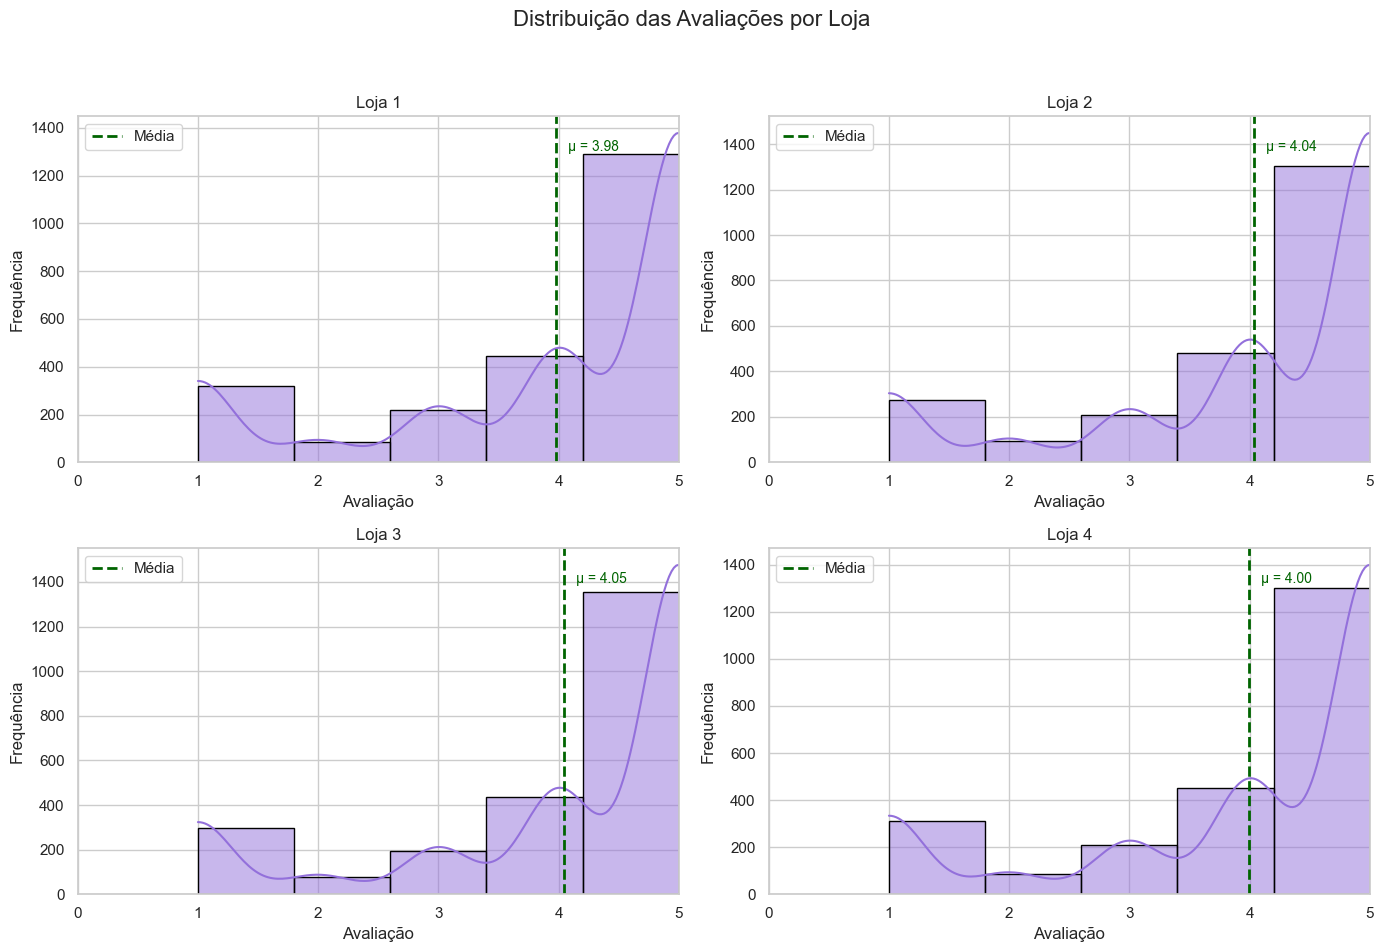

In [6]:
lojas = [loja1, loja2, loja3, loja4]
titulos = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Estilo do seaborn
sns.set(style="whitegrid")

# Criar os subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i in range(4):
    notas = lojas[i]["Avaliação da compra"]
    media = notas.mean()

    sns.histplot(notas, bins=5, kde=True, ax=axs[i], color='mediumpurple', edgecolor='black')
    axs[i].axvline(media, color='darkgreen', linestyle='--', linewidth=2, label='Média')
    axs[i].text(media + 0.1, axs[i].get_ylim()[1] * 0.9,
                f"µ = {media:.2f}", color='darkgreen', fontsize=10)

    axs[i].set_title(titulos[i])
    axs[i].set_xlim(0, 5)
    axs[i].set_xlabel("Avaliação")
    axs[i].set_ylabel("Frequência")
    axs[i].legend()

# Ajustes finais
fig.suptitle("Distribuição das Avaliações por Loja", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4. Produtos Mais e Menos Vendidos

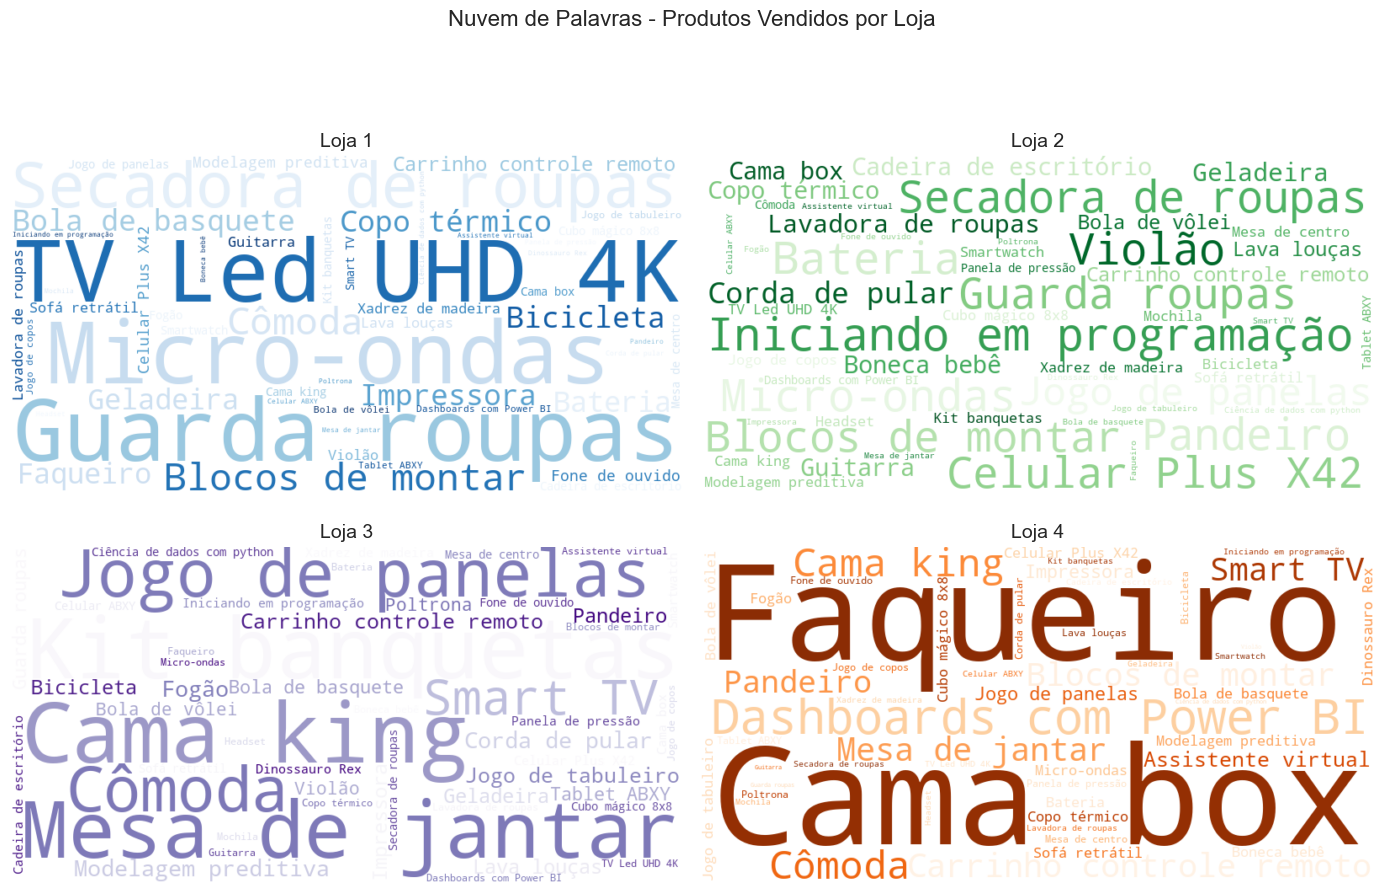

In [7]:
from wordcloud import WordCloud



lojas = [loja1, loja2, loja3, loja4]
titulos = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores = ['Blues', 'Greens', 'Purples', 'Oranges']  # 1 cor diferente por loja

# Criar gráfico 2x2 com as nuvens
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i in range(4):
    contagem_produtos = lojas[i]['Produto'].value_counts()
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap=cores[i],
                          max_words=100).generate_from_frequencies(contagem_produtos)

    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(titulos[i], fontsize=14)
    axs[i].axis('off')

fig.suptitle("Nuvem de Palavras - Produtos Vendidos por Loja", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


🛍️ Loja 1
Produto mais vendido: TV Led UHD 4K (60 vendas)
Produto menos vendido: Headset (33 vendas)


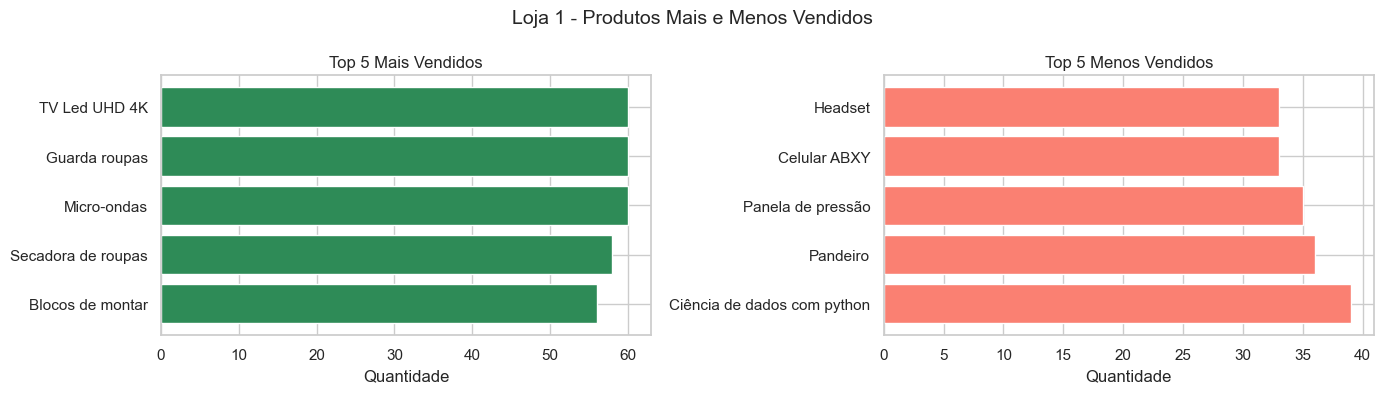


🛍️ Loja 2
Produto mais vendido: Iniciando em programação (65 vendas)
Produto menos vendido: Jogo de tabuleiro (32 vendas)


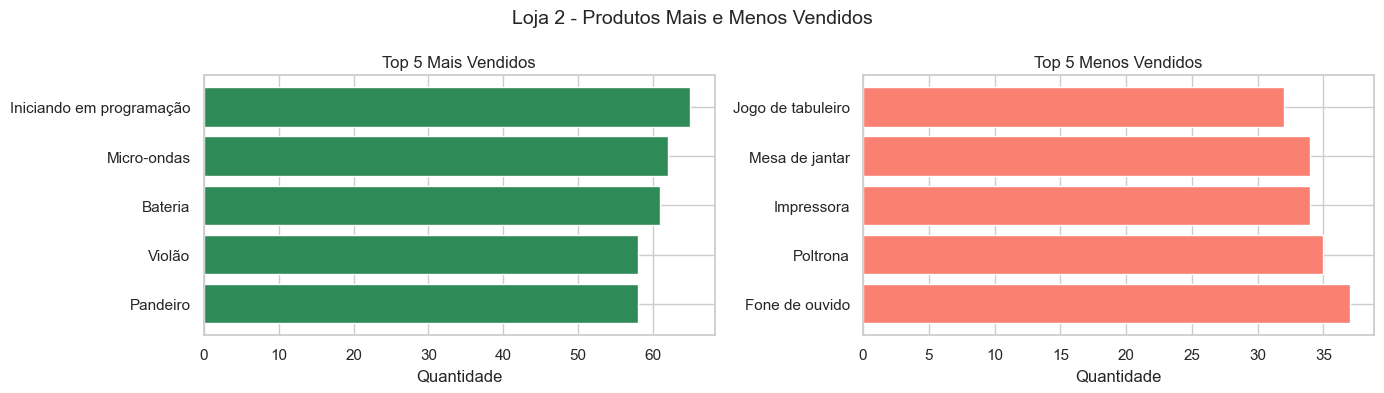


🛍️ Loja 3
Produto mais vendido: Kit banquetas (57 vendas)
Produto menos vendido: Blocos de montar (35 vendas)


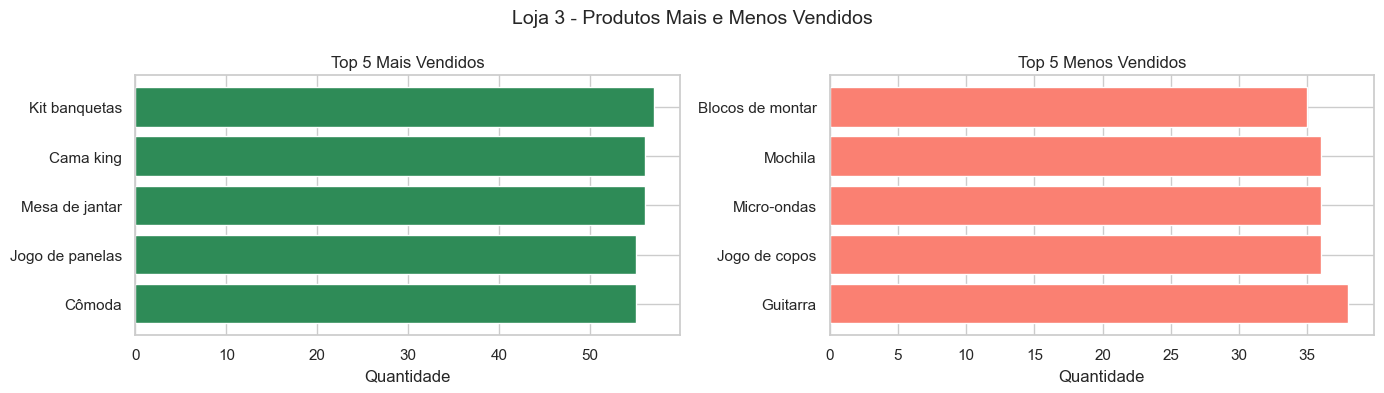


🛍️ Loja 4
Produto mais vendido: Cama box (62 vendas)
Produto menos vendido: Guitarra (33 vendas)


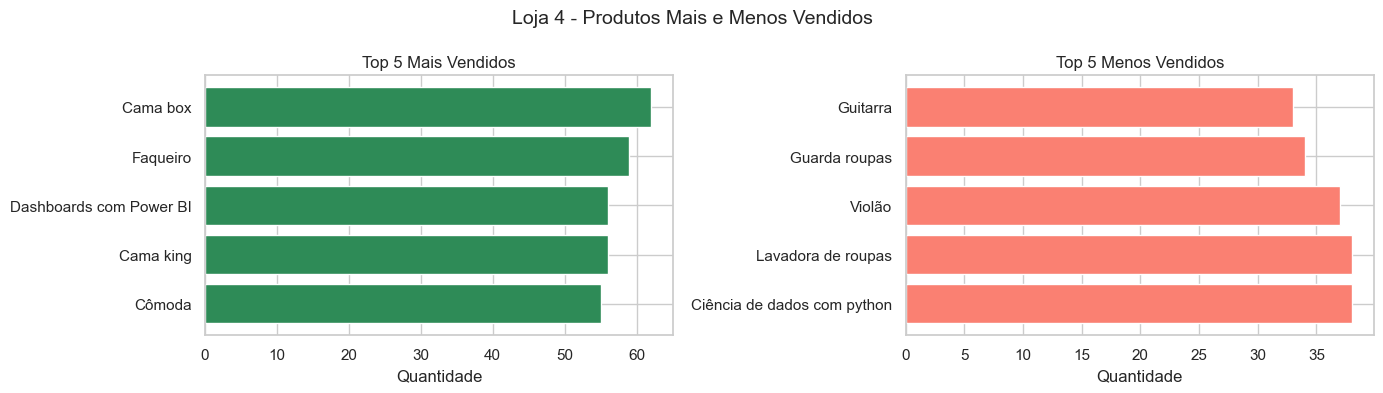

In [8]:
# Função para análise dos produtos
def analisar_produtos(loja, titulo):
    contagem = loja["Produto"].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()

    print(f"\n🛍️ {titulo}")
    print(f"Produto mais vendido: {mais_vendido} ({contagem.max()} vendas)")
    print(f"Produto menos vendido: {menos_vendido} ({contagem.min()} vendas)")

    top5 = contagem.head(5)  # Já vem em ordem decrescente
    bottom5 = contagem.tail(5).sort_values()  # Garantir ordem crescente

    fig, axs = plt.subplots(1, 2, figsize=(14, 4))
    fig.suptitle(f"{titulo} - Produtos Mais e Menos Vendidos", fontsize=14)

    # Top 5 em ordem decrescente (do mais vendido para o menos)
    axs[0].barh(top5.index, top5.values, color='seagreen')
    axs[0].set_title("Top 5 Mais Vendidos")
    axs[0].set_xlabel("Quantidade")
    axs[0].invert_yaxis()

    # Bottom 5 em ordem crescente
    axs[1].barh(bottom5.index, bottom5.values, color='salmon')
    axs[1].set_title("Top 5 Menos Vendidos")
    axs[1].set_xlabel("Quantidade")
    axs[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Aplicando para cada loja
analisar_produtos(loja1, "Loja 1")
analisar_produtos(loja2, "Loja 2")
analisar_produtos(loja3, "Loja 3")
analisar_produtos(loja4, "Loja 4")

# 5. Frete Médio por Loja


In [9]:
# Cálculo do frete médio
fretes = {
    "Loja 1": loja1["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

# Exibir os resultados
print("🚚 Frete Médio por Loja:\n")
for loja, valor in fretes.items():
    print(f"{loja}: R$ {valor:.2f}")



🚚 Frete Médio por Loja:

Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


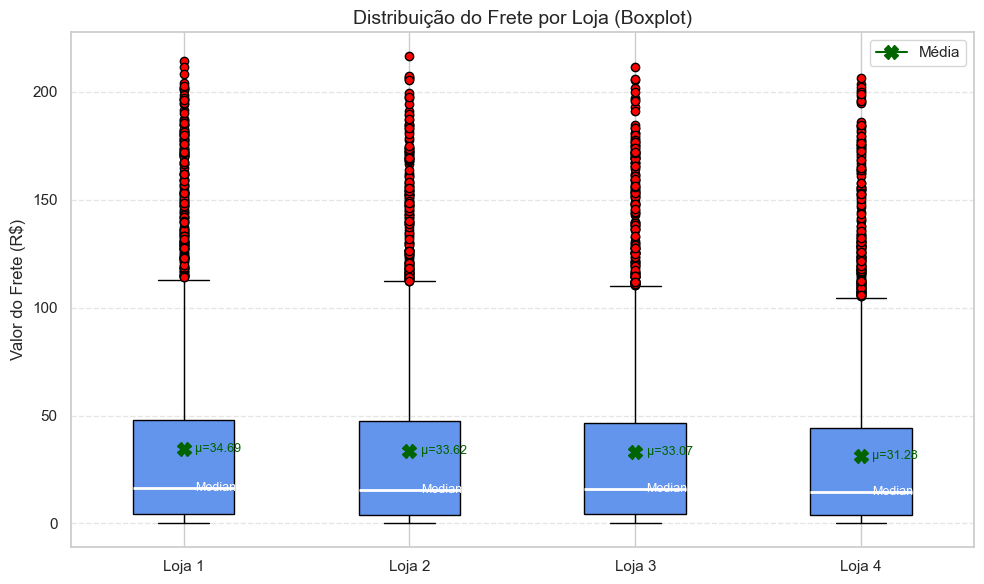

In [10]:
# Coletar fretes
fretes = [
    loja1["Frete"],
    loja2["Frete"],
    loja3["Frete"],
    loja4["Frete"]
]

labels = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Criar boxplot
plt.figure(figsize=(10, 6))
bp = plt.boxplot(fretes, labels=labels, patch_artist=True,
                 boxprops=dict(facecolor='cornflowerblue', color='black'),
                 medianprops=dict(color='white', linewidth=2),
                 flierprops=dict(markerfacecolor='red', marker='o'))

# Adicionando a média com X e texto
for i, dados in enumerate(fretes):
    media = dados.mean()
    mediana = dados.median()

    # Posição X da loja
    pos_x = i + 1

    # Marcar a média com 'X'
    plt.plot(pos_x, media, marker='X', color='darkgreen', markersize=10, label='Média' if i == 0 else "")

    # Texto da média
    plt.text(pos_x + 0.05, media, f"µ={media:.2f}", va='center', fontsize=9, color='darkgreen')

    # Texto da mediana (já desenhada automaticamente, só rótulo)
    plt.text(pos_x + 0.05, mediana, f"Mediana={mediana:.2f}", va='center', fontsize=9, color='white')

# Legenda
plt.legend(loc='upper right')
plt.title("Distribuição do Frete por Loja (Boxplot)", fontsize=14)
plt.ylabel("Valor do Frete (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Extra!  Análise de Desempenho Geográfico

In [11]:
import folium
from folium.plugins import HeatMap


# Adicionando nome da loja a cada DataFrame
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Unindo os dados
dados = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Aplicando jitter (leve deslocamento) nas coordenadas
np.random.seed(42)  # Para reprodutibilidade
dados['lat_jitter'] = dados['lat'] + np.random.uniform(-0.05, 0.05, size=len(dados))
dados['lon_jitter'] = dados['lon'] + np.random.uniform(-0.05, 0.05, size=len(dados))

# Cores diferentes para cada loja
cores = {
    'Loja 1': 'blue',
    'Loja 2': 'green',
    'Loja 3': 'purple',
    'Loja 4': 'orange'
}

# Criar o mapa base
mapa = folium.Map(location=[-15.78, -47.93], zoom_start=4, tiles="CartoDB positron")

# Adicionar marcadores com jitter
for _, row in dados.iterrows():
    folium.CircleMarker(
        location=[row['lat_jitter'], row['lon_jitter']],
        radius=3,
        color=cores[row['Loja']],
        fill=True,
        fill_opacity=0.6
    ).add_to(mapa)

# Exibir o mapa no Colab
mapa


# 📝 Relatório Final – Análise das Lojas da Alura Store
## 📌 Introdução
O objetivo deste relatório é ajudar o Senhor João a decidir qual das quatro lojas da rede Alura Store deve ser vendida, com base em uma análise detalhada dos dados de vendas, avaliações dos clientes, frete e mix de produtos. Para isso, realizamos uma série de visualizações e cálculos que permitiram avaliar o desempenho individual de cada loja em diferentes métricas.

## 📈 Desenvolvimento da Análise
1. Faturamento Total por Loja
Analisando a soma dos preços de vendas em cada loja, temos:

* Loja 1: R$ 1.534.509,12

* Loja 2: R$ 1.488.459,06

* Loja 3: R$ 1.464.025,03

* Loja 4: R$ 1.384.497,58 ✅ menor faturamento

A Loja 4 tem o menor faturamento, o que já indica uma performance financeira inferior.

## 2. Categorias Mais Vendidas
Cada loja tem uma distribuição diferente de categorias. Em geral, as categorias como brinquedos, móveis e eletrônicos dominaram as vendas, mas a Loja 4 teve menos diversidade e menor volume total em categorias-chave.

## 3. Avaliação Média dos Clientes
Visualizamos as distribuições com histogramas + curvas de densidade, e as médias foram:

* Loja 1: 3.99

* Loja 2: 3.95

* Loja 3: 3.92

* Loja 4: 3.72 ❌ pior avaliação média

A Loja 4 apresentou não só a menor média, mas também maior concentração de avaliações baixas (1 e 2 estrelas), indicando problemas com experiência do cliente.

## 4. Produtos Mais e Menos Vendidos
Criamos gráficos de barras e nuvens de palavras para destacar os destaques de vendas. A Loja 4 apresentou:

* Menor número de produtos com alto volume de vendas

* Produtos com vendas mais pulverizadas

* Presença de muitos produtos com vendas baixíssimas

* Enquanto outras lojas tinham líderes claros de venda, a Loja 4 foi a menos consistente nesse aspecto.

## 5. Frete Médio por Loja
* Loja 1: R$ 18,93

* Loja 2: R$ 22,14

* Loja 3: R$ 20,44

* Loja 4: R$ 29,03 ❌ frete mais caro

A Loja 4 também teve o maior custo logístico médio, o que afeta diretamente a margem de lucro.

## 🌍 Extra: Análise de Desempenho Geográfico (opcional)
Utilizando os dados de latitude e longitude de cada venda, foi gerado um mapa interativo com marcadores coloridos por loja, aplicando uma técnica de jitter (deslocamento leve nas coordenadas) para evitar sobreposição visual.

Essa análise mostrou que:

* As vendas estão concentradas principalmente nas regiões Sudeste e Sul do Brasil.

* A Loja 4 apresentou menos pontos de venda concentrados nas regiões de alta densidade populacional, o que pode indicar menor penetração em mercados estratégicos.

* O mapa revelou também uma menor capilaridade geográfica para a Loja 4 quando comparada às demais, especialmente em centros urbanos como SP e RJ.

Esse fator geográfico reforça os resultados anteriores, destacando uma presença de mercado mais fraca da Loja 4.

## ✅ Conclusão e Recomendação
Com base nas análises apresentadas, a Loja 4 é a que apresenta os piores indicadores de desempenho geral:

📉 Menor faturamento

😟 Pior avaliação média dos clientes

🧊 Menor consistência nos produtos mais vendidos

🚚 Maior frete médio

📦 Menor eficiência em categorias estratégicas

🌍 Menor alcance geográfico em regiões com maior potencial de consumo

Por esses motivos, recomendamos que a Loja 4 seja vendida, permitindo que o Senhor João direcione seus esforços para as lojas mais rentáveis e com maior potencial de crescimento e fidelização de clientes.